# Regresión usando MLPs: [US Health Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Dividiremos este notebook en las siguientes secciones:
1. Preprocesamiento de datos
2. Arquitectura del modelo
3. Entrenamiento y evaluación
4. Conclusión

## ⚙️ 1. Preprocesamiento de datos 
En el ámbito de ML, la etapa de preprocesamiento de datos juega un papel crucial en el éxito de un modelo. Esta etapa implica preparar los datos de entrada para entrenar y probar el modelo, incluyendo varios pasos. Por ejemplo:

* **Limpieza de datos**: Eliminar cualquier dato incompleto, irrelevante o inexacto del conjunto de datos. Esto es para asegurar que los datos de entrada sean de alta calidad y no contengan valores atípicos o errores que puedan afectar el rendimiento de la red neuronal.

* **Exploración de datos**: Analizar el conjunto de datos para obtener información sobre su distribución y relaciones entre características. Este paso ayuda a identificar patrones o tendencias en los datos que podrían utilizarse para mejorar el rendimiento de la red neuronal.

* **Normalización de datos**: Escalar los datos para que todas las características tengan escalas similares. Este es un paso importante ya que asegura que la red neuronal no otorgue peso indebido a características que tengan valores más grandes.

* **Selección de características**: Seleccionar las features más importantes que se utilizarán para entrenar la red neuronal.

* **Codificación de datos**: Convertir variables categóricas en variables numéricas, ya que las máquinas solo aceptan datos numéricos como entrada.

* **Aumento de datos**: Generar datos de entrenamiento adicionales para aumentar la diversidad del conjunto de datos.

Típicamente, se establece un pipeline de preprocesamiento de datos automatizando los pasos mencionados anteriormente de manera secuencial, asegurando así que cualquier dato futuro esté sujeto a los mismos procedimientos de preprocesamiento de manera consistente y eficiente. Esto no solo ahorra tiempo sino que también asegura que los datos sean tratados de manera uniforme, independientemente de su origen o formato.

Debido a los tiempos de la clase, vamos a pasar por alto el proceso de exploración y limpieza de datos para centrarnos en nuestro objetivo principal. Por lo tanto, cargaremos un dataset de costos médicos y lo prepararemos para el modelo con solo unos pocos pasos simples.

### 📊 Dataset

Para generar nuestro modelo de regresión, vamos a utilizar el [US Health Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) para predecir costos médicos basados en las características individuales de los pacientes y la política de la obra social.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import nnet

In [3]:
df = pd.read_csv("./datasets/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Identifico columnas numéricas y categóricas

In [4]:
numerical_features = ["age", "bmi"]
categorical_features = ["sex", "children", "smoker", "region"]

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Defino mi variable de salida: `charges`

In [7]:
X = df.drop("charges", axis=1)
y = df["charges"]

Separo mi "dev set" en train y val

In [8]:
X_train, X_val, y_train, y_val = utils.train_val_split(X, y, val_size=0.2, random_state=42)

#### Standard Scaler

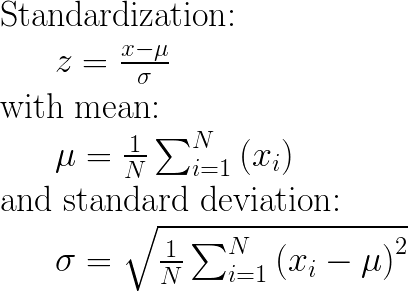

In [9]:
scaler = utils.StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_features])
X_val_num = scaler.fit_transform(X_val[numerical_features])

#### One Hot Encoding

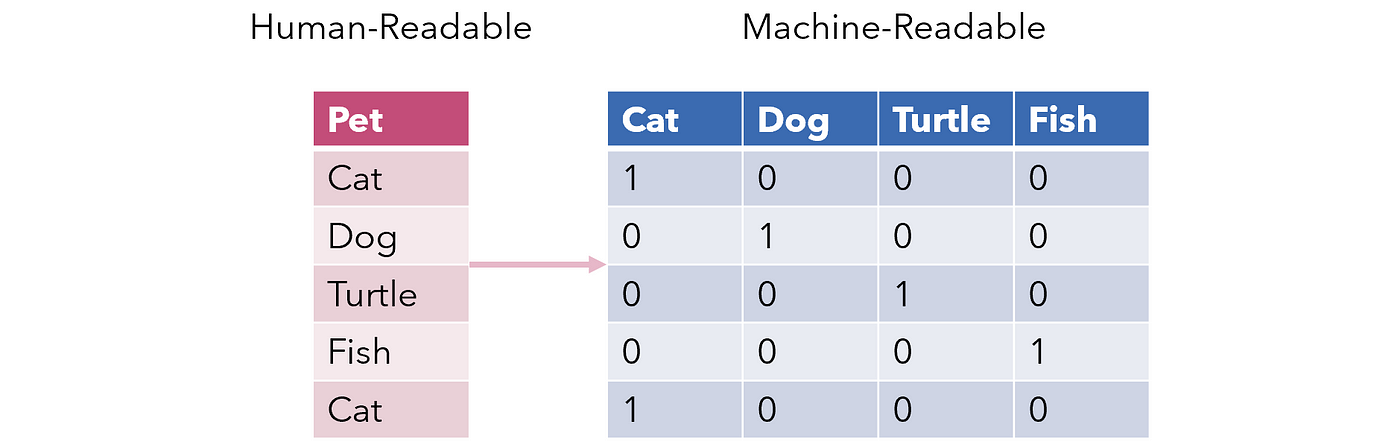

In [10]:
X_train_cat = utils.one_hot_encode(X_train[categorical_features])
X_val_cat = utils.one_hot_encode(X_val[categorical_features])

In [11]:
X_train_transformed = pd.concat([pd.DataFrame(X_train_num, columns=numerical_features), X_train_cat], axis=1)

X_train_transformed

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,0.404516,-0.906158,1,0,0,0,1,0,0,0,1,0,1,0,0,0
887,-0.240006,-0.116322,1,0,1,0,0,0,0,0,1,0,0,1,0,0
890,1.765174,-0.627392,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1293,0.476130,-0.813236,0,1,0,0,0,1,0,0,1,0,0,1,0,0
259,-1.457437,0.193417,0,1,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.977425,-1.324306,1,0,0,0,0,1,0,0,0,1,1,0,0,0
496,-0.598074,-1.162916,1,0,0,0,1,0,0,0,1,0,0,0,0,1
1157,-1.170982,-1.231384,1,0,0,0,1,0,0,0,1,0,0,1,0,0
1326,0.189676,0.348287,1,0,1,0,0,0,0,0,1,0,1,0,0,0


In [12]:
X_val_transformed = pd.concat([pd.DataFrame(X_val_num, columns=numerical_features), X_val_cat], axis=1)

X_val_transformed

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
517,0.443904,0.018822,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1069,1.071143,0.255659,1,0,0,1,0,0,0,0,1,0,0,0,1,0
476,-1.019654,-0.317469,0,1,1,0,0,0,0,0,0,1,1,0,0,0
157,-1.437813,-0.877955,0,1,1,0,0,0,0,0,0,1,1,0,0,0
16,0.931757,0.066864,1,0,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.437813,0.162947,1,0,0,0,0,0,1,0,1,0,1,0,0,0
1130,0.025745,-1.097935,1,0,0,0,0,0,0,1,1,0,0,0,1,0
1294,1.349916,-0.877955,0,1,1,0,0,0,0,0,1,0,1,0,0,0
860,-0.113642,2.902163,1,0,0,0,1,0,0,0,0,1,0,0,0,1


## 🧠 2. Arquitectura del modelo

La "arquitectura" del modelo se refiere a la estructura de la red neuronal/perceptrón multicapa que relaciona las features de entrada con la(s) de salida. 

La arquitectura del modelo depende del problema en particular y del dataset en particular. Es posible modificarla al cambiar sus hiperparámetros (número de capas ocultas (y cantidad de nodos en cada una), función de activación de cada capa, lambda si hay regularización, etc.)

In [74]:
np.random.seed(42)
input_nodes = len(X_train_transformed.columns)
model = nnet.MLP(layers=[input_nodes, 150, 1], 
                 activations=['relu','linear'])

## 💪 3. Entrenamiento del modelo

In [75]:
X_train_np = X_train_transformed.to_numpy()
X_val_np = X_val_transformed.to_numpy()
train_data = list(zip(X_train_np, y_train.values.reshape(-1, 1)))  
valid_data = list(zip(X_val_np, y_val.values.reshape(-1, 1)))  

# Train the MLP
t_losses, v_losses = model.fit(training_data=train_data, 
                               epochs=300, 
                               mini_batch_size=16, 
                               lr=1e-5,
                               val_data=valid_data)

Epoch 0: Train Loss: 80422820.45298867 | Val loss: 333916324.9399851
Epoch 1: Train Loss: 116898159.59416947 | Val loss: 330690319.9919222
Epoch 2: Train Loss: 157045341.2453806 | Val loss: 327109384.86548615
Epoch 3: Train Loss: 128903523.42014997 | Val loss: 323657620.9993893
Epoch 4: Train Loss: 193690099.2941228 | Val loss: 320140784.95589834
Epoch 5: Train Loss: 108452083.93316421 | Val loss: 316698356.1201019
Epoch 6: Train Loss: 268856450.371402 | Val loss: 313327335.0402543
Epoch 7: Train Loss: 215205298.40049702 | Val loss: 310027848.0526577
Epoch 8: Train Loss: 137507450.3654478 | Val loss: 392927834.3688134
Epoch 9: Train Loss: 243902368.0066271 | Val loss: 303793867.05435085
Epoch 10: Train Loss: 152450219.45062637 | Val loss: 300693545.74215513
Epoch 11: Train Loss: 323674812.119072 | Val loss: 297657167.91050106
Epoch 12: Train Loss: 148814749.06553122 | Val loss: 294684721.4777673
Epoch 13: Train Loss: 90757393.84338602 | Val loss: 291774790.27209985
Epoch 14: Train Loss

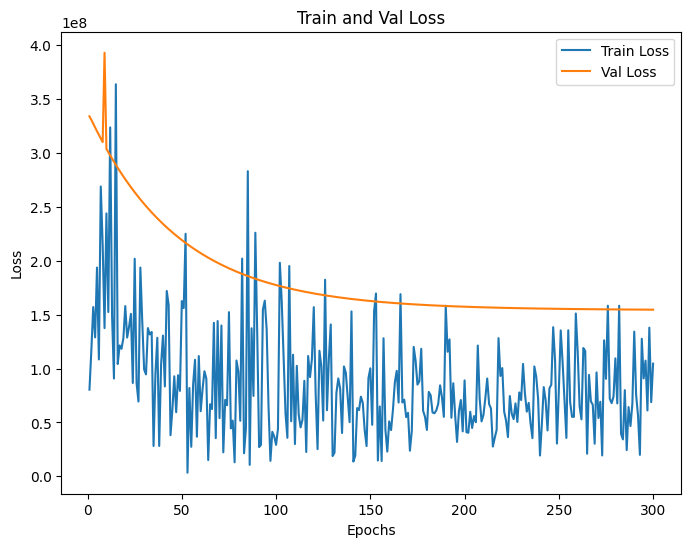

In [76]:
# Plot the training and test losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(t_losses) + 1), t_losses, label='Train Loss')
plt.plot(range(1, len(v_losses) + 1), v_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Val Loss')
plt.legend()
plt.show()

### 🤔💭 ¿Que está pasando? ¿Cómo lo solucionamos?